## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

C:\Users\julia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


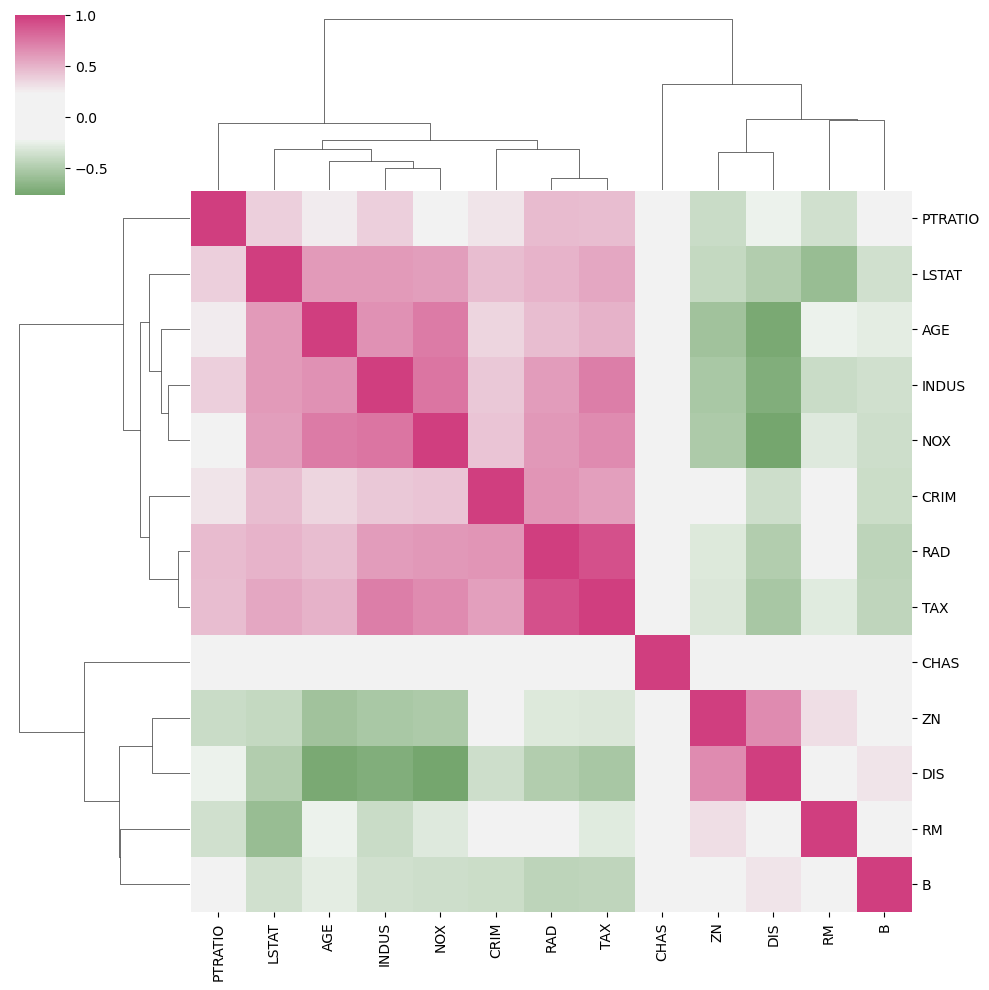

In [6]:
#clustermap para visualizar a correlação
cmap=sns.diverging_palette(h_neg=125,h_pos=350, as_cmap=True,sep=60,center='light')

sns.clustermap(X.corr(),figsize=(10,10),center=0,cmap=cmap)

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=2360873)

In [33]:
#Árvore com profundidade 2
regr_1=DecisionTreeRegressor(max_depth=9)
#Árvore com profundidade 8
regr_2=DecisionTreeRegressor(max_depth=8)

In [34]:
#Treinando árvore de profundidade 2 com o método fit
regr_1.fit(X_train,Y_train)

#Treinando árvore de profundidade 8 com o método fit
regr_2.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=8)

In [35]:
mse1=regr_1.score(X_train,Y_train)
mse2=regr_2.score(X_train,Y_train)

In [36]:
#Coeficiente de determinação (R^2)
mse1=regr_1.score(X_train,Y_train)
mse2=regr_2.score(X_train,Y_train)

template='O R-quadrado da árvore com profundidade={0} é: {1:.2f}'

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=9 é: 0,99
O R-quadrado da árvore com profundidade=8 é: 0,98


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [47]:
#com a base de treinamento
path=regr_1.cost_complexity_pruning_path(X_train,Y_train)
path
#impurities= r-quadrado

{'ccp_alphas': array([0.00000000e+00, 1.49982636e-16, 2.39972217e-15, 1.31926121e-05,
        1.31926121e-05, 1.31926121e-05, 1.18733509e-04, 1.18733509e-04,
        2.11081794e-04, 3.29815303e-04, 3.29815303e-04, 3.29815303e-04,
        4.74934037e-04, 5.32102023e-04, 6.46437995e-04, 7.43183817e-04,
        8.44327177e-04, 8.61917326e-04, 8.61917326e-04, 1.31926121e-03,
        1.31926121e-03, 1.59630607e-03, 1.59630607e-03, 1.59630607e-03,
        1.93931398e-03, 1.94283201e-03, 2.28759894e-03, 2.39445910e-03,
        2.54177661e-03, 2.58575198e-03, 2.58575198e-03, 2.74846086e-03,
        2.96833773e-03, 3.37730871e-03, 3.37730871e-03, 3.44766931e-03,
        3.74010554e-03, 3.79947230e-03, 3.81266491e-03, 4.55936675e-03,
        4.74934037e-03, 4.76253298e-03, 5.54749340e-03, 5.77044855e-03,
        6.05892700e-03, 6.35004398e-03, 6.87774846e-03, 7.14379947e-03,
        7.18337731e-03, 7.39226033e-03, 7.44415128e-03, 8.37467018e-03,
        9.04636261e-03, 9.30518909e-03, 9.69656992

Text(0, 0.5, 'Impureza total das folhas')

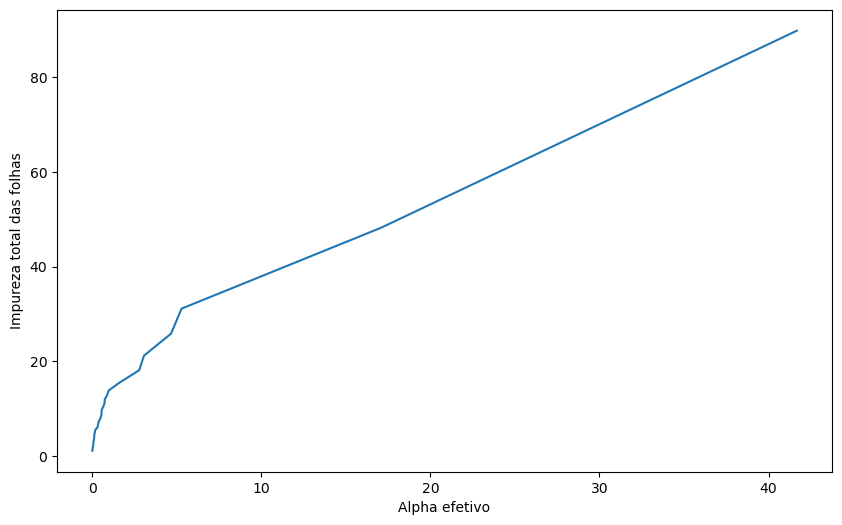

In [48]:
ccp_aphas,impurities=path.ccp_alphas,path.impurities
#plotando em um gráfico de linha
plt.figure(figsize=(10,6))
plt.plot(ccp_aphas,impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [49]:
#todas as árvores possíveis com os diferentes ccps
clfs = []

for ccp_apha in ccp_aphas:
    clf=DecisionTreeRegressor(random_state=0,ccp_alpha=ccp_apha)
    clf.fit(X_train,Y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

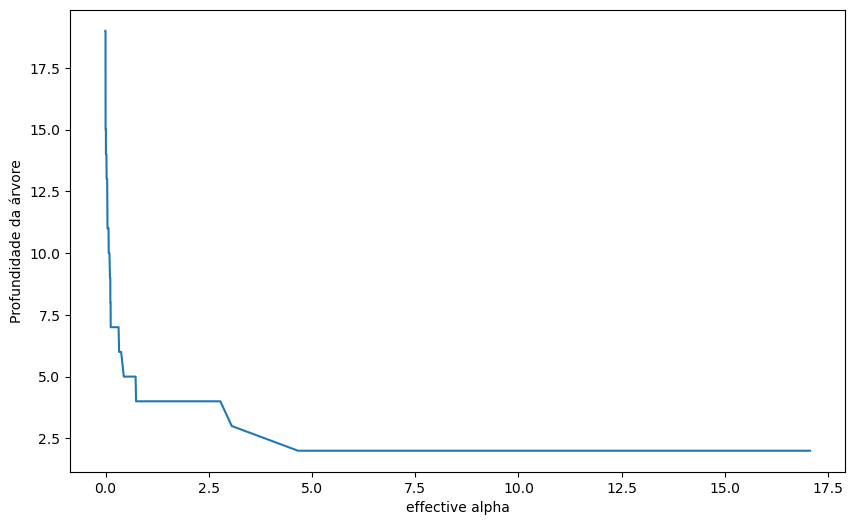

In [50]:
#aumentando ccps (reduzindo profundidade)

tree_depths=[clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_aphas[:-1],tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [60]:
#mse na base teste e na base treino em função do alpha realizafo no conjunto clfs
train_scores=[mean_squared_error(Y_train,clf.predict(X_train)) for clf in clfs]
test_scores=[mean_squared_error(Y_test,clf.predict(X_test)) for clf in clfs]



### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

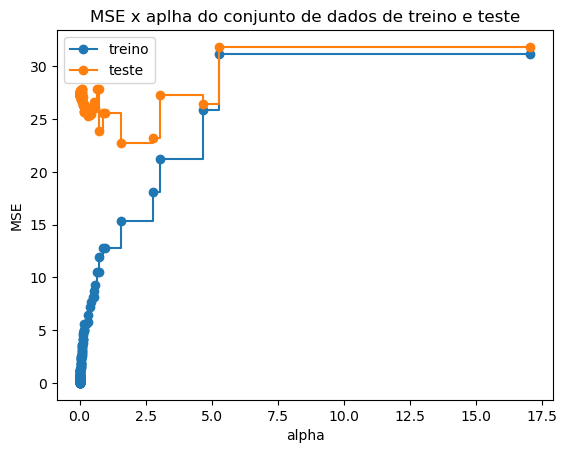

In [61]:

#plotando gráfico de análise do mse
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x aplha do conjunto de dados de treino e teste")
ax.plot(ccp_aphas[:-1],train_scores[:-1],marker="o",label="treino",
       drawstyle="steps-post")
ax.plot(ccp_aphas[:-1],test_scores[:-1],marker="o",label="teste",
       drawstyle="steps-post")

ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [67]:
arvore_final=DecisionTreeRegressor(random_state=0,ccp_alpha=.25)
arvore_final.fit(X_train,Y_train)

print(f"profundidade: {arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de treino: {arvore_final.score(X_train,Y_train):.2f}")
print(f"MSE na base de treino: {mean_squared_error(Y_train,arvore_final.predict(X_train)):2f}")

profundidade: 7
R-quadrado na base de treino: 0.94
MSE na base de treino: 5.550938


### 7. Visualize esta árvore.

In [69]:
import graphviz
import matplotlib.pyplot as plt

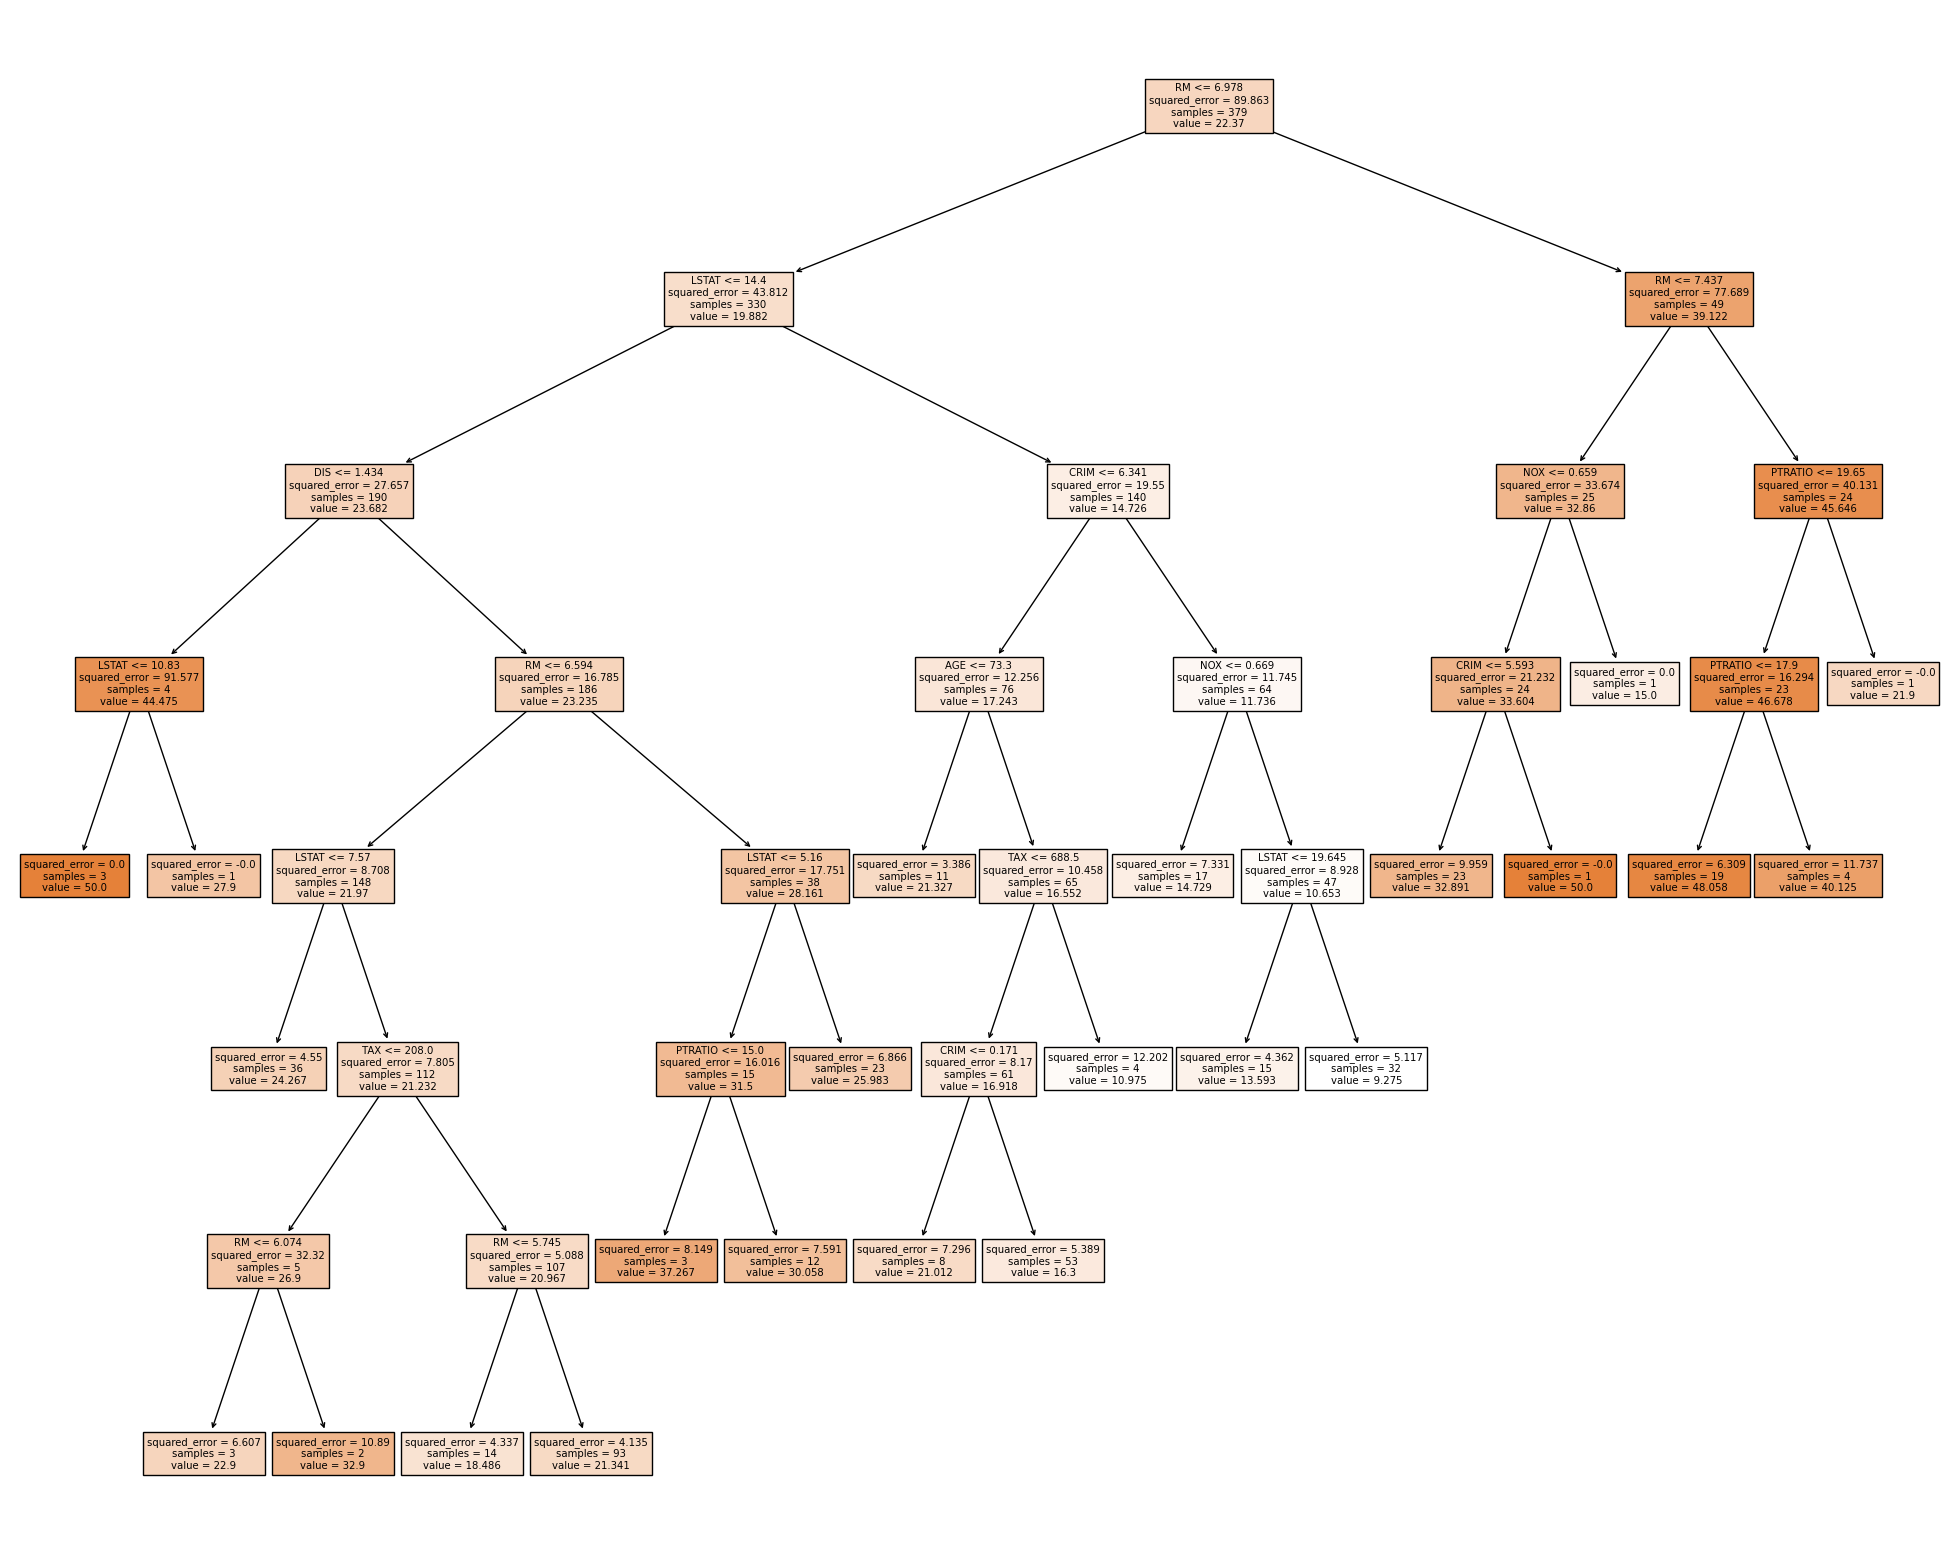

In [76]:
plt.rc('figure',figsize=(25,20))

tp=tree.plot_tree(arvore_final,
                  feature_names=X.columns,
                  filled=True)

plt.savefig("figure.png")

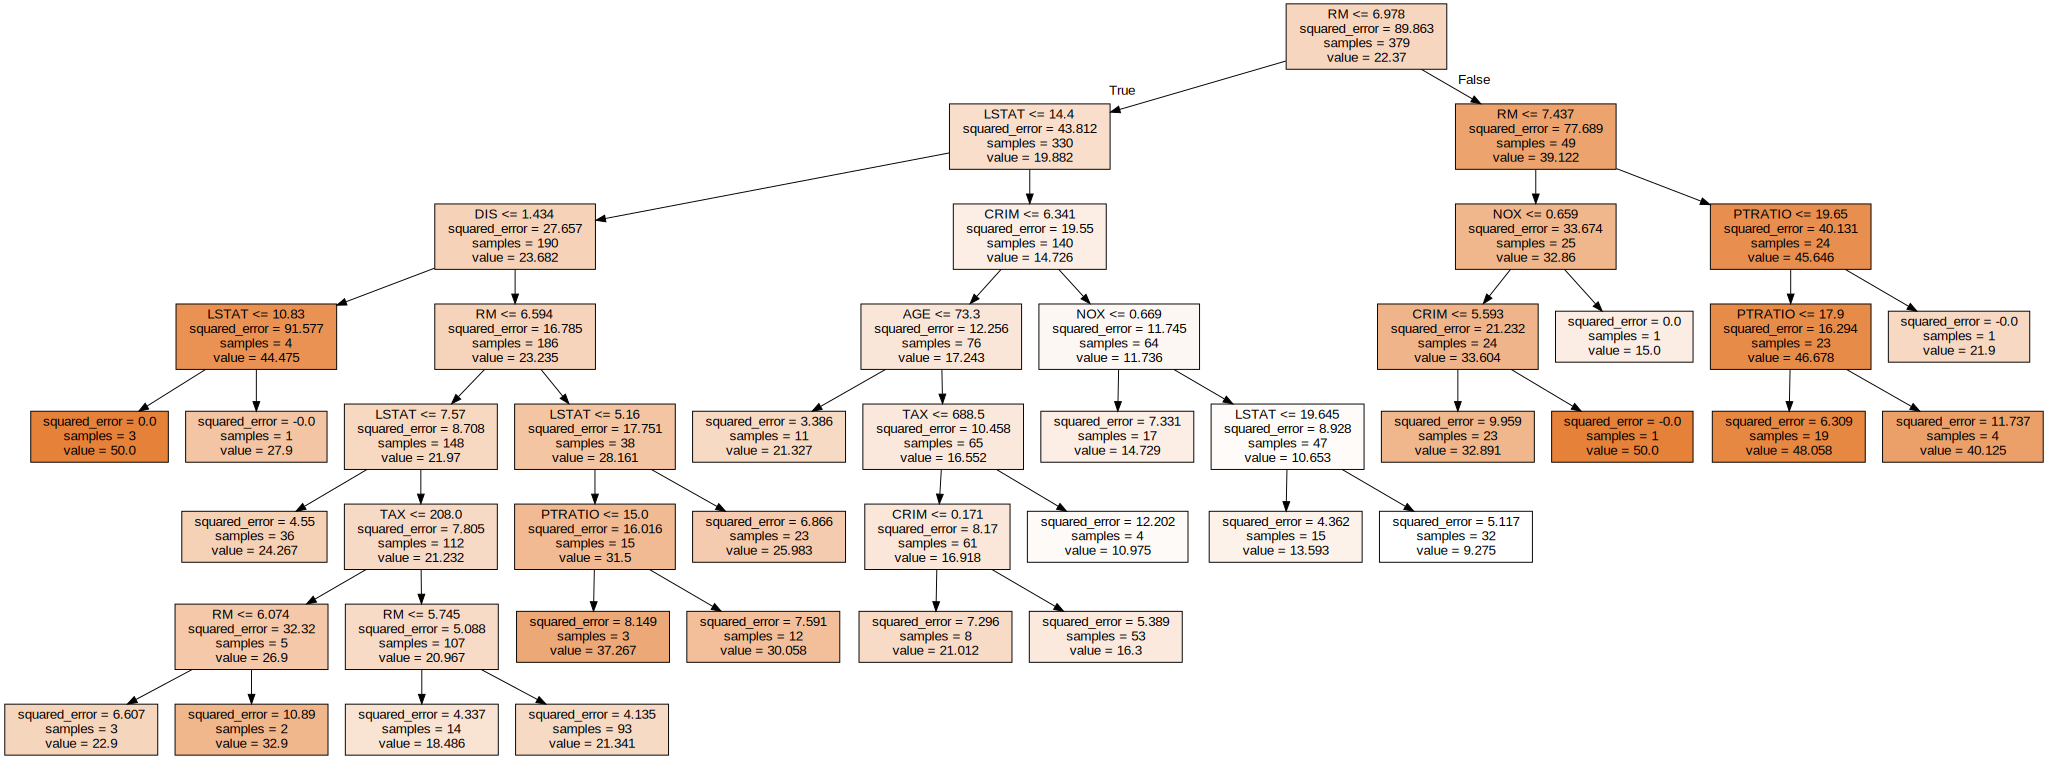

In [73]:
dot_data=tree.export_graphviz(arvore_final,out_file=None,
                             feature_names=X.columns,
                             filled=True)

graph=graphviz.Source(dot_data,format="png")
graph